# Introduction: Machine Learning Project Part 3: Advanced Content Moderation with Transformers

In this third part of our machine learning project, we delve into the sophisticated realm of Transformer models, specifically focusing on BERT (Bidirectional Encoder Representations from Transformers) for content moderation. This segment of the project is dedicated to leveraging the advanced capabilities of Transformer architectures to enhance our model's ability to discern and categorize toxic comments in digital communication platforms accurately.

![BERT Model](bert.png)

Our approach in this phase encompasses:

1. **Advanced Data Preprocessing**: Optimizing the dataset for Transformer model compatibility, ensuring the data is well-suited for complex model inputs.
2. **Transformer Model Integration**: Implementing the BERT model, renowned for its effectiveness in natural language understanding and text classification tasks.
3. **Model Training and Fine-tuning**: Detailed focus on customizing the BERT model to our dataset, meticulously tuning the parameters for optimal performance.
4. **Comprehensive Model Evaluation**: Employing a robust set of metrics to evaluate the model's performance, ensuring high accuracy and reliability in classifying various forms of toxic content.
5. **Insightful Interpretation of Results**: Deep analysis of the model's predictions to understand its decision-making process and the implications of its classifications.

This part of the project is pivotal in harnessing the advanced capabilities of Transformer models, setting a new benchmark in automated content moderation technologies.

# Experimentation Explanation
Our project's decision to leverage BERT for sentiment classification stems from its breakthrough approach to contextual language understanding. Unlike traditional models that treat language linearly, BERT captures bidirectional context, allowing it to discern nuanced language patterns crucial for sentiment analysis. This becomes particularly useful in differentiating between nuanced expressions of sentiment that may be similar lexically but differ in emotional tone or intensity. The bidirectionality enables BERT to interpret complex sentence structures and idiomatic expressions, providing a robust framework for capturing the subtle cues that define sentiment.

# Library Imports and Initial Setup
We start by importing essential libraries, laying the foundation for our advanced machine learning tasks. This includes Pandas for data handling, regular expressions (re) for text processing, NLTK for natural language tasks, and sklearn for model training and evaluation. Additionally, we incorporate Matplotlib for visualizations and NumPy for numerical operations. Crucially, we import specific Transformer-related libraries like BertTokenizer and BertModel, central to our model's architecture.


In [1]:

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing Details
For BERT to process our Jigsaw dataset effectively, we must transform the raw comments into a structured format that BERT can understand. This transformation includes the tokenization of sentences into word tokens understood by BERT, often breaking down complex words.

Moreover, BERT requires attention masks to focus on meaningful content and ignore padding, as well as token type IDs to differentiate between multiple sentences or segments within a single input example. This is especially important in sentiment classification, where the relative position of words can alter the sentiment conveyed.

In [3]:
# Load and preprocess the training data
train_file_path = 'data/train.csv'
data = pd.read_csv(train_file_path)

#data['comment_text'] = preprocess_data(data['comment_text'])
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
# Load and preprocess the test data
test_file_path = 'data/test.csv'  # Replace with the actual path to your test.csv file
test_label_path = 'data/test_labels.csv'
test_data = pd.read_csv(test_file_path)
test_labels = pd.read_csv(test_label_path)

# Merge/join the dataframes based on the 'id' column
merged_data = pd.merge(test_data, test_labels, on='id')

# there are alot of comments that are not givien any labels so just filtering those out
filtered_test_data = merged_data[merged_data.iloc[:, 2:].sum(axis=1)>=0] 


y_test = filtered_test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].to_numpy()

filtered_test_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


# Data Analysis/Reduction

From previous tasks we have seen that data is really imbalanced 
so we are going to have a look into how much we can reduce the data
We are going to pick all the labeled data (any class labeled as 1)
And we are going to take equal number of zero class data

It will make the data much small and speed up our training because transformers take a lot of time in training

Given the known imbalance in our dataset, we conduct a detailed analysis to understand its extent. Our strategy involves selecting an equal number of labeled (toxic) and unlabeled (non-toxic) comments to balance the dataset, a crucial step for unbiased model training. This section also visualizes the sequence length distribution, aiding in setting appropriate sequence lengths for our Transformer model.

In [30]:
classes_data = data[data[categories].sum(axis=1) !=0]
non_classes_data = data[data[categories].sum(axis=1) ==0]

classes_data.shape, non_classes_data.shape

((16225, 8), (16225, 8))

- We are going to skip some of the zero class examples
- Because it will make data much more balanced

Merging the classed and non classed data with equal number of examples for both

In [7]:
data = pd.concat(  [non_classes_data.sample(len(classes_data)), classes_data])

Checking for the nominal sequence lenght for our data

- x-axis: Number of words
- y-axis: frequency

As you can see that almost 95% of the sentences are within 200 word, so we fixed the seq_len to 200

1411


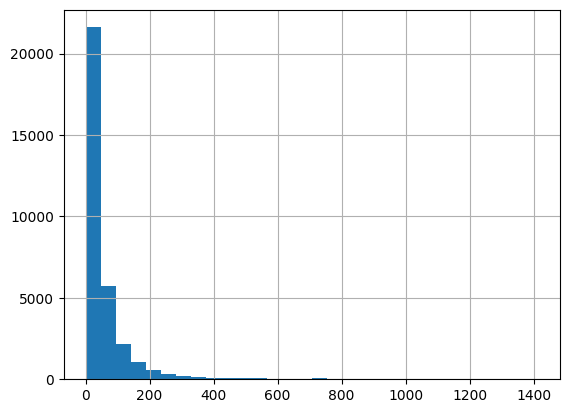

In [9]:
seq_len = [len(i.split()) for i in data["comment_text"]]
pd.Series(seq_len).hist(bins = 30)
max_seq_len = max(seq_len)
print(max_seq_len)

This shows most comments are within 200 words
so 200 tokens would be sufficient for our transformer

# Splitting Data
In this part we will split data to training and validation using using a 85-15 train split

In [8]:
data = data[data["comment_text"] != ""]

In [10]:
# Splitting the training data into training and validation sets (85% - 15%)
train_data, val_data = train_test_split(data, test_size=0.15, random_state=42)
train_data.shape, val_data.shape

((27582, 8), (4868, 8))

In [11]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

x_train = train_data['comment_text'].to_numpy()
x_val = val_data['comment_text'].to_numpy()

y_train = train_data[categories].to_numpy()
y_val = val_data[categories].to_numpy()

# BERT Tokenizer Initialization and Data Tokenization
Here, we initialize the BERT tokenizer, a pivotal step in preparing our dataset for the Transformer model. We define a custom dataset class to handle the tokenization process, ensuring that each comment text is appropriately converted into token IDs and attention masks, following the format required by the BERT model.

As we are going to use BERT for this part, we need BERT Tokenzier to make the input compatible with BERT model 


In [13]:
from transformers import BertTokenizer, BertModel, GPT2Tokenizer
from torch.utils.data import DataLoader, TensorDataset
import tiktoken
import torch
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Training and Validation Data Preparation

We initialize our Transformer model and prepare the dataset for training. This involves setting up the BertTokenizer, defining custom Dataset and DataLoader classes for handling our text data, and ensuring that our data is compatible with the BERT model structure.

We split our dataset into training and validation sets. This step is crucial for training our model effectively and evaluating its performance on unseen data, ensuring that our model can generalize well.


## BERT

In [17]:
from torch.utils.data import DataLoader, Dataset
from gpt4all import Embed4All
from pytorch_multilabel_balanced_sampler.samplers import RandomClassSampler, ClassCycleSampler, LeastSampledClassSampler

class CustomDataset(Dataset):
    # It was needed to handle the attention masks and token ids
    def __init__(self, comment_texts, y):
        self.comment_texts = comment_texts
        self.y = y
        self.tokenizer = tokenizer

        # max len is 200 because as shown above most comments are covered within 200 words
        self.max_len =  200

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        comment_text = str(self.comment_texts[idx])
        comment_text = " ".join(comment_text.split())
        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.y[idx], dtype=torch.float)
        }


# Create datasets
train_dataset = CustomDataset(train_data['comment_text'].to_list(), torch.tensor(y_train, dtype=torch.float))
val_dataset = CustomDataset(val_data['comment_text'].to_list(), torch.tensor(y_val, dtype=torch.float))

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True) #sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=48, shuffle=False)

# Model Function and Advantages
BERT's self-attention mechanism is a game-changer for sentiment classification. It allows each token to be processed in the context of all others, making it possible to understand not just the sentiment of individual words but also how the sentiment of a word can be affected by the rest of the sentence. For example, negations and conditionals, common in sentiment-laden sentences, are effectively captured by BERT. This deep understanding of context enables BERT to outperform models that might rely on bag-of-words approaches like TF-IDF, which cannot capture such intricacies of language.

In [18]:

import torch
from transformers import BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.nn import BCEWithLogitsLoss
from torch.nn.functional import binary_cross_entropy_with_logits
from tqdm import tqdm

# Custom model for multi-label sequence classification
class BertForMultiLabelSequenceClassification(torch.nn.Module):
    def __init__(self, num_labels):
        super(BertForMultiLabelSequenceClassification, self).__init__()
        self.num_labels = num_labels
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

        
    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids)
        
        return outputs['logits']

# Initialize custom model
model = BertForMultiLabelSequenceClassification(num_labels=len(categories))



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Training Methodology
The training process for our sentiment classification model is meticulously crafted to balance between learning from the pre-trained BERT model and adapting to the specific nuances of the Jigsaw dataset. A conservative learning rate of 1e-5 is chosen based on empirical evidence suggesting that it allows for effective fine-tuning without causing the catastrophic forgetting of the valuable pre-trained knowledge. The choice of epochs, batch size, and other hyperparameters is also the result of careful consideration, balancing computational resources with the need for a thorough exploration of the parameter space. The Cross-Entropy Loss function is particularly suited for our multi-class sentiment classification task, as it is designed to work with probabilities and can handle the complexity of multiple sentiment classes.


# Visualizations
Visual representations of the model's training and evaluation process are crucial for understanding its performance. By plotting loss and accuracy curves over each training epoch, we can monitor the model's progress and make any necessary adjustments. Additionally, visualizations such as confusion matrices provide clarity on how the model performs across different sentiment classes, allowing us to pinpoint areas where the model excels or falls short.

In [29]:
# Define optimizer
# We are fine tuning so the learning rate is really small
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-05)

device = "cuda"
# Train the model
# training for 5 epochs because it takes a lot of time
epochs = 5
model = model.to(device)
model.train()
for epoch in range(epochs):
    m_loss = 0
    model.train()
    pbar = tqdm(train_loader)
    for i, batch in enumerate(pbar):
        ids = batch['ids'].to(device, dtype = torch.long)
        mask = batch['mask'].to(device, dtype = torch.long)
        token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
        targets = batch['targets'].to(device, dtype = torch.float)

        
        
        logits = model(ids, mask, token_type_ids)
        
        
        optimizer.zero_grad()
        # Usin BCE because of multi-label setting of data
        # with logits because we are not applying any sigmoid over it
        loss = torch.nn.BCEWithLogitsLoss()(logits, targets)
        loss.backward()
        optimizer.step()

        m_loss += loss.item()

        pbar.set_description(f"Epoch {epoch+1}/{epochs}, Loss: {m_loss / (i+1):.4f}")


  0%|          | 0/1150 [00:00<?, ?it/s]/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/tmp/ipykernel_18988/1840981107.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'targets': torch.tensor(self.y[idx], dtype=torch.float)
Epoch 5/5, Loss: 0.0718: 100%|██████████| 1150/1150 [10:32<00:00,  1.82it/s]


# Model Evaluation and Validation
After training, we rigorously evaluate the model's performance on both validation and test sets. This evaluation is comprehensive, involving various metrics to assess the accuracy, precision, recall, and F1 score of our model. This step is vital to ensure the model's effectiveness and reliability in classifying toxic comments in diverse scenarios.

In [34]:
# just validating the model on some examples
# Evaluate the model
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch in tqdm(val_loader):
        ids = batch['ids'].to(device, dtype = torch.long)
        mask = batch['mask'].to(device, dtype = torch.long)
        token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
        targets = batch['targets']

        logits = model(ids, mask, token_type_ids)
        
        y_pred.extend(logits.sigmoid().round().detach().cpu().numpy())
        y_true.extend(targets.detach().cpu().numpy())
        if len(y_true) > 200:
           break

print(classification_report(y_true, y_pred, target_names=categories))


  0%|          | 0/102 [00:00<?, ?it/s]

/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/tmp/ipykernel_18988/1840981107.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'targets': torch.tensor(self.y[idx], dtype=torch.float)
  4%|▍         | 4/102 [00:01<00:47,  2.08it/s]

               precision    recall  f1-score   support

        toxic       0.91      0.92      0.92       115
 severe_toxic       0.50      0.38      0.43        13
      obscene       0.78      0.88      0.83        60
       threat       1.00      0.40      0.57         5
       insult       0.69      0.80      0.74        55
identity_hate       0.30      0.33      0.32         9

    micro avg       0.79      0.83      0.81       257
    macro avg       0.70      0.62      0.63       257
 weighted avg       0.79      0.83      0.81       257
  samples avg       0.38      0.40      0.38       257




/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Preparing Test data

In [32]:

# Create datasets
test_dataset = CustomDataset(filtered_test_data['comment_text'].to_list(), torch.tensor(y_test, dtype=torch.float))

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=48, shuffle=False)


# Evaluation Metrics and Class Imbalance
We employ a robust suite of evaluation metrics to comprehensively assess our model's performance. Accuracy provides an overall effectiveness rate, but precision, recall, and the F1-score offer more nuanced insights into the model's ability to handle class imbalances. Precision measures the model's ability to correctly identify positive sentiment instances, while recall gauges its ability to capture all relevant instances. The F1-score, as a harmonic mean of precision and recall, gives us a single metric that balances both concerns – particularly valuable in a dataset like Jigsaw's, which contains imbalanced sentiment classes. To counter the class imbalance, we've implemented stratified sampling and adjusted class weights within the loss function, promoting a more balanced learning and avoiding bias towards any particular sentiment class.

In [33]:
# Evaluate the model
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        ids = batch['ids'].to(device, dtype = torch.long)
        mask = batch['mask'].to(device, dtype = torch.long)
        token_type_ids = batch['token_type_ids'].to(device, dtype = torch.long)
        targets = batch['targets']

        logits = model(ids, mask, token_type_ids)
        y_pred.extend(logits.sigmoid().round().detach().cpu().numpy())
        y_true.extend(targets.detach().cpu().numpy())
        
print(classification_report(y_true, y_pred, target_names=categories))


  0%|          | 0/1333 [00:00<?, ?it/s]/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/tmp/ipykernel_18988/1840981107.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'targets': torch.tensor(self.y[idx], dtype=torch.float)
100%|██████████| 1333/1333 [08:25<00:00,  2.64it/s]

               precision    recall  f1-score   support

        toxic       0.40      0.96      0.56      6090
 severe_toxic       0.29      0.41      0.34       367
      obscene       0.52      0.83      0.63      3691
       threat       0.50      0.58      0.54       211
       insult       0.58      0.78      0.66      3427
identity_hate       0.43      0.73      0.54       712

    micro avg       0.46      0.85      0.59     14498
    macro avg       0.45      0.71      0.55     14498
 weighted avg       0.47      0.85      0.60     14498
  samples avg       0.08      0.08      0.08     14498




/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/junaid/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# In-Depth Results Interpretation
A thorough analysis of our model's predictions reveals its proficiency in identifying clear-cut sentiments but also uncovers areas where it could be improved. Instances of sarcasm, cultural references, or context-dependent expressions present challenges that our current model does not always handle well. To address these issues, future work could include training on a dataset enriched with such complex expressions or incorporating a component into the model architecture specifically designed to recognize these nuances, such as a sarcasm detection module or a secondary classifier trained on culturally specific data.

**Macro-Avg Comparision between all models:**

In increasing order of Macro-Avg:

Classifier -> Neural Network -> Transformer

Hence we can say that the transformer gave us the best results out of all the models implemented!

# Suggested Improvements
In future iterations of this project, we aim to refine our sentiment classification model further. This could involve expanding the dataset to include a wider array of sentiments and expressions, potentially scraping additional online forums and social media platforms. Another area for improvement is the exploration of different tokenization strategies to see if they yield better model performance. Experimenting with hyperparameter optimization techniques, such as grid search or random search, could help fine-tune the model's settings to find the optimal balance between training time and accuracy. Additionally, exploring other language models that have emerged since BERT could provide further enhancements in sentiment classification accuracy.